# **Библиотека**

In [ ]:
!pip install tensorflow
!pip install keras-tuner

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
df= pd.read_csv('/content/submission.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      10000 non-null  int64
 1   label   10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


# **Анализ данных**

In [ ]:
# настройки для удобства визуального восприятия
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Загрузка данных
train_data = pd.read_csv('/content/fmnist_train.csv')
test_data = pd.read_csv('/content/fmnist_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/fmnist_train.csv'

In [ ]:
# Знакомимся с датасетами
train_data
test_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,9995
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,9996
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,9997
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9998


In [ ]:
# Проверка наличия пропущенных значений
print(train_data.isnull().sum())
print(test_data.isnull().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Id          0
Length: 786, dtype: int64
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Id          0
Length: 785, dtype: int64


In [ ]:
# Удаляем пропуски
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
# Проверка
print(train_data.isnull().sum().max())

0


# **Построение и обучение модели**

In [ ]:

# Разделение данных на признаки и метки
X_train = train_data.drop(['label', 'Id'], axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop(['Id'], axis=1).values

# Нормализация
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

# Изменение размера данных
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Преобразование меток в категории
y_train = to_categorical(y_train, num_classes=10)

# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [ ]:
# Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
426/426 [==============================] - 15s 33ms/step - loss: 0.8640 - accuracy: 0.6879 - val_loss: 0.5336 - val_accuracy: 0.8052
Epoch 2/30
426/426 [==============================] - 14s 33ms/step - loss: 0.5525 - accuracy: 0.7970 - val_loss: 0.4400 - val_accuracy: 0.8286
Epoch 3/30
426/426 [==============================] - 14s 33ms/step - loss: 0.4690 - accuracy: 0.8266 - val_loss: 0.4117 - val_accuracy: 0.8457
Epoch 4/30
426/426 [==============================] - 17s 40ms/step - loss: 0.4078 - accuracy: 0.8494 - val_loss: 0.3785 - val_accuracy: 0.8586
Epoch 5/30
426/426 [==============================] - 15s 36ms/step - loss: 0.3660 - accuracy: 0.8682 - val_loss: 0.3408 - val_accuracy: 0.8756
Epoch 6/30
426/426 [==============================] - 20s 47ms/step - loss: 0.3379 - accuracy: 0.8751 - val_loss: 0.3319 - val_accuracy: 0.8815
Epoch 7/30
426/426 [==============================] - 15s 34ms/step - loss: 0.3116 - accuracy: 0.8851 - val_loss: 0.3259 - val_accuracy:

107/107 - 1s - loss: 0.5540 - accuracy: 0.8885 - 791ms/epoch - 7ms/step
Validation accuracy: 0.8885


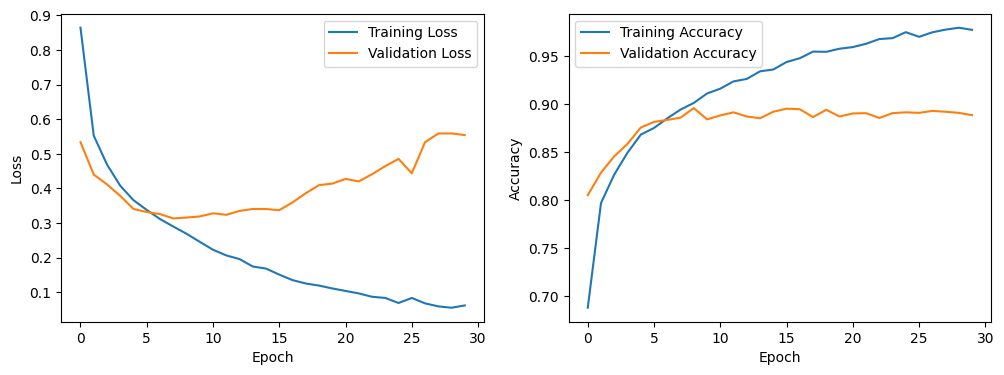

In [ ]:
# Оценка модели
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print(f'Validation accuracy: {val_acc:.4f}')

# График потерь и точности
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Предсказание на тестовых данных
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

313/313 [==============================] - 3s 8ms/step


In [ ]:
# Подготовка и сохранение файла с результатами
submission = pd.DataFrame({'Id': test_data['Id'], 'label': y_pred_test_classes})
submission.to_csv('submission.csv', index=False)